# Motor Vehicle Collisions in New York City

[Dataset Link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)


## Dataset Schema

| Column Name                     | Description |
|--------------------------------|-------------|
| `CRASH DATE`                   | Date of the collision. |
| `CRASH TIME`                   | Time of the collision. |
| `BOROUGH`                      | The borough in which the collision took place. |
| `ZIP CODE`                     | The ZIP code in which the collision occurred. |
| `LATITUDE`                     | Latitude of the collision location. |
| `LONGITUDE`                    | Longitude of the collision location. |
| `LOCATION`                     | A tuple of the latitude and longitude (Lat, Long). |
| `ON STREET NAME`               | Name of the street on which the collision occurred. |
| `CROSS STREET NAME`            | The nearest cross street to the location where the collision occurred. |
| `OFF STREET NAME`              | Off-street name where the collision occurred, e.g., parking lots or driveways. |
| `NUMBER OF PERSONS INJURED`    | Total number of persons injured. |
| `NUMBER OF PERSONS KILLED`     | Total number of persons killed. |
| `NUMBER OF PEDESTRIANS INJURED`| Number of pedestrians injured. |
| `NUMBER OF PEDESTRIANS KILLED` | Number of pedestrians killed. |
| `NUMBER OF CYCLIST INJURED`    | Number of cyclists injured. |
| `NUMBER OF CYCLIST KILLED`     | Number of cyclists killed. |
| `NUMBER OF MOTORIST INJURED`   | Number of motorists injured. |
| `NUMBER OF MOTORIST KILLED`    | Number of motorists killed. |
| `CONTRIBUTING FACTOR VEHICLE 1`| Primary reason for the collision from the perspective of vehicle 1. |
| `CONTRIBUTING FACTOR VEHICLE 2`| Primary reason for the collision from the perspective of vehicle 2. |
| `CONTRIBUTING FACTOR VEHICLE 3`| Primary reason for the collision from the perspective of vehicle 3. |
| `CONTRIBUTING FACTOR VEHICLE 4`| Primary reason for the collision from the perspective of vehicle 4. |
| `CONTRIBUTING FACTOR VEHICLE 5`| Primary reason for the collision from the perspective of vehicle 5. |
| `COLLISION_ID`                 | Unique ID for the collision. |
| `VEHICLE TYPE CODE 1`          | Type of vehicle involved in the collision for vehicle 1. |
| `VEHICLE TYPE CODE 2`          | Type of vehicle involved in the collision for vehicle 2. |
| `VEHICLE TYPE CODE 3`          | Type of vehicle involved in the collision for vehicle 3. |
| `VEHICLE TYPE CODE 4`          | Type of vehicle involved in the collision for vehicle 4. |
| `VEHICLE TYPE CODE 5`          | Type of vehicle involved in the collision for vehicle 5. |


## Overview

In [76]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

df = pd.read_csv('motor-vehicle-collisions-2022.csv', parse_dates=['CRASH DATE'])
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
1,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
2,2022-06-29,16:00,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE OUTER ROADWA,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4542336,Motorscooter,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2022-07-12,17:50,BROOKLYN,11225.0,40.663303,-73.96049,"(40.663303, -73.96049)",NaN,NaN,44 EMPIRE BOULEVARD,...,Unspecified,NaN,NaN,NaN,4545699,Sedan,NaN,NaN,NaN,NaN
4,2022-03-23,10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71 EAST DRIVE,...,NaN,NaN,NaN,NaN,4512922,Bike,NaN,NaN,NaN,NaN


# Days with the most crashes per year

In [77]:

collision_counts = df.groupby('CRASH DATE').size().reset_index(name='Crash Number')

collision_counts = collision_counts.rename(columns={'CRASH DATE': 'Date'})

collision_counts.set_index('Date', inplace=True)

top_20_days = collision_counts.sort_values(by='Crash Number', ascending=False).head(20)

top_20_days

,Crash Number
Date,
2022-12-16,373
2022-06-17,369
2022-06-10,366
2022-05-06,365
2022-09-09,364
2022-06-25,364
2022-03-18,362
2022-06-15,361
2022-04-29,361


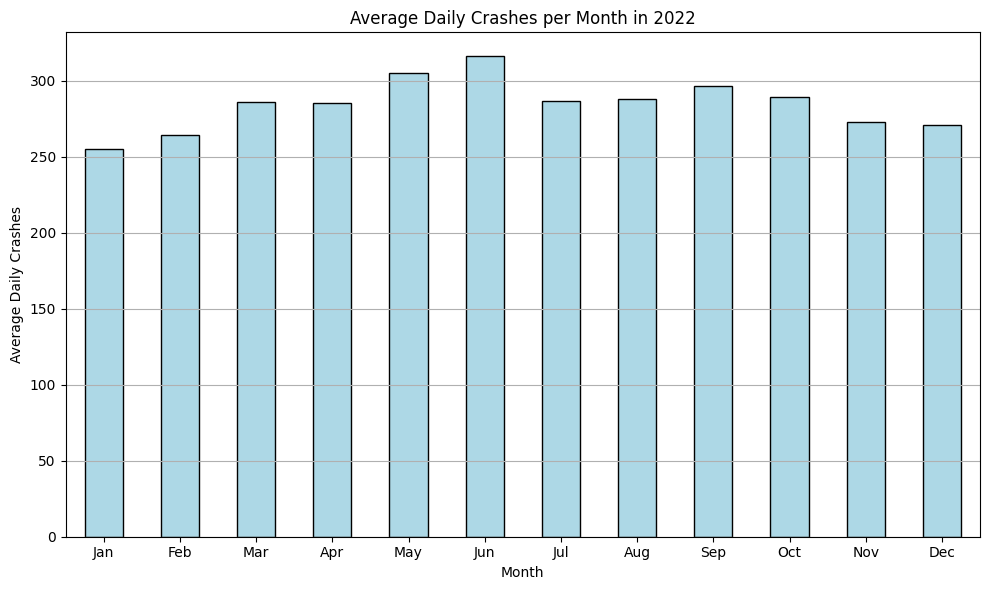

In [78]:
collision_counts['Month'] = collision_counts.index.month

# Group by month and calculate the average of daily crashes for each month
avg_daily_crashes_per_month = collision_counts.groupby('Month')['Crash Number'].mean()

plt.figure(figsize=(10, 6))
avg_daily_crashes_per_month.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Average Daily Crashes per Month in 2022')
plt.xlabel('Month')
plt.ylabel('Average Daily Crashes')
plt.xticks(ticks=range(12),
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


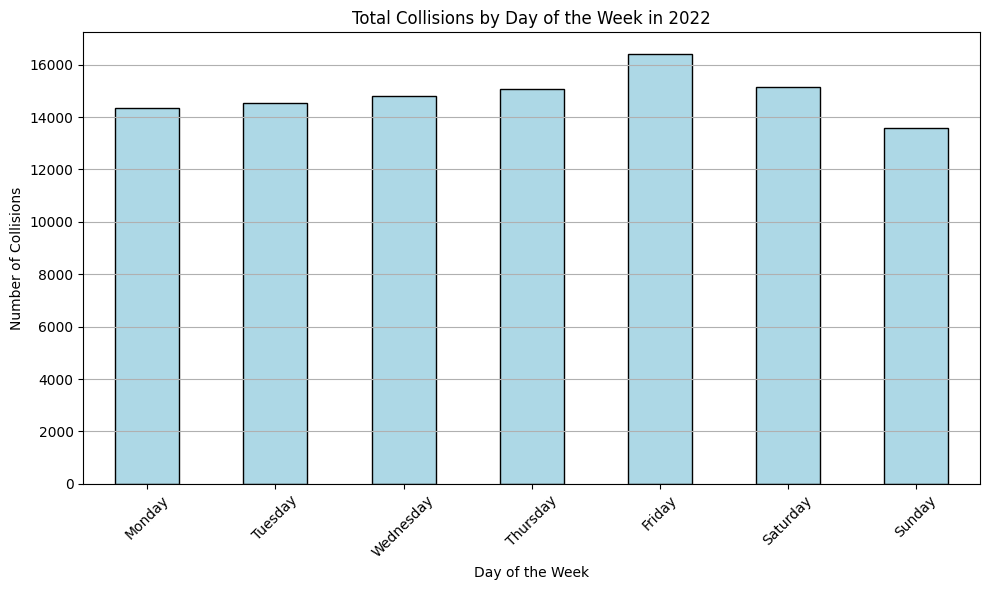

In [79]:
collision_counts['DayOfWeek'] = collision_counts.index.day_name()
weekly_collision_counts = collision_counts.groupby('DayOfWeek')['Crash Number'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_collision_counts = weekly_collision_counts.reindex(ordered_days)


plt.figure(figsize=(10, 6))
weekly_collision_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Total Collisions by Day of the Week in 2022')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

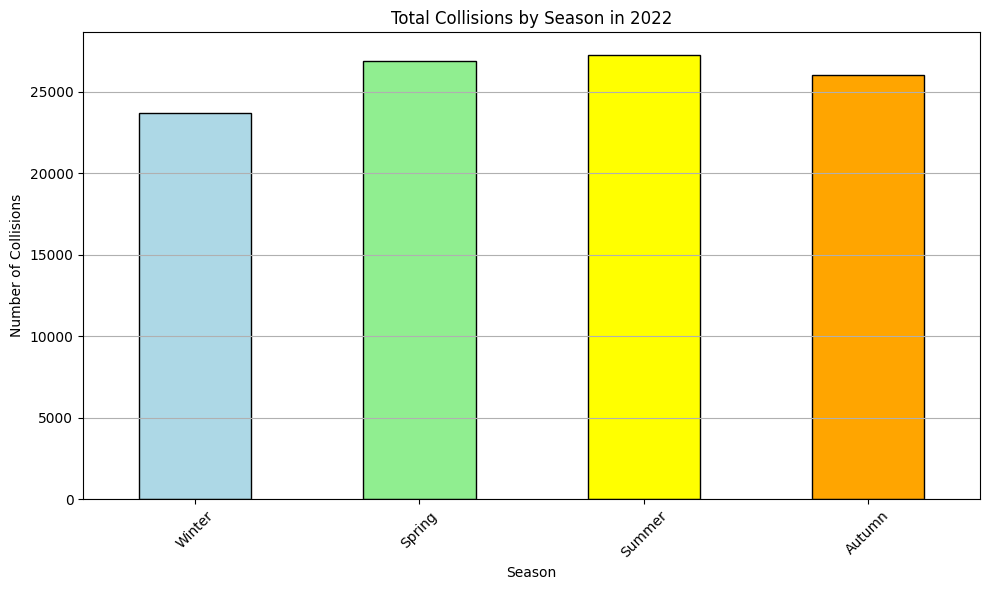

In [80]:

def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

collision_counts['Season'] = collision_counts.index.month.map(month_to_season)

seasonal_collision_counts = collision_counts.groupby('Season')['Crash Number'].sum()

ordered_seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_collision_counts = seasonal_collision_counts.reindex(ordered_seasons)

season_colors = {'Winter': 'lightblue', 'Spring': 'lightgreen', 'Summer': 'yellow', 'Autumn': 'orange'}

plt.figure(figsize=(10, 6))
seasonal_collision_counts.plot(kind='bar', color=[season_colors[season] for season in ordered_seasons], edgecolor='black')

plt.title('Total Collisions by Season in 2022')
plt.xlabel('Season')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


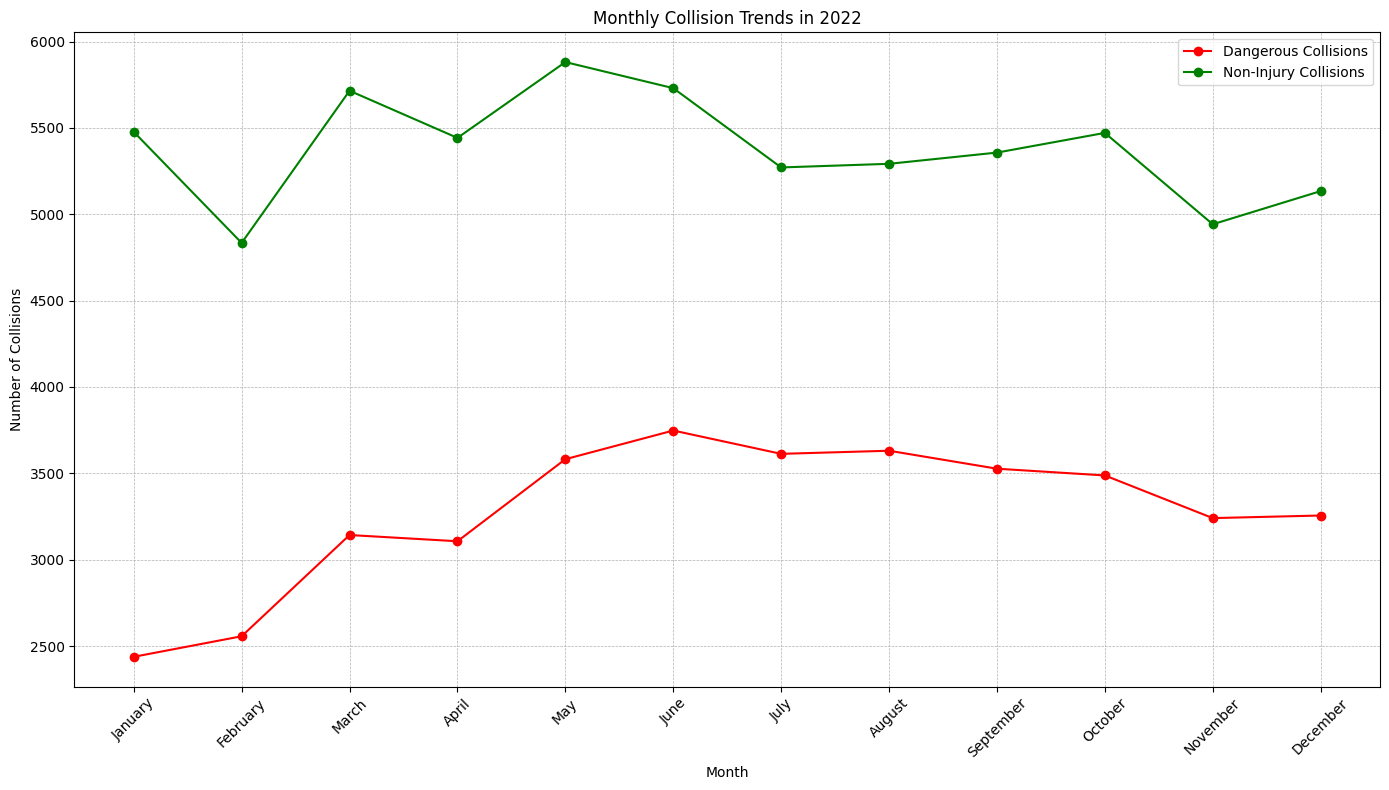

In [81]:
def classify_collision(row):
    if row['NUMBER OF PERSONS INJURED'] > 0 or row['NUMBER OF PERSONS KILLED'] > 0:
        return 'Dangerous'
    else:
        return 'Non-Injury'

df['Collision Type'] = df.apply(classify_collision, axis=1)

monthly_collision_counts = df.groupby([df['CRASH DATE'].dt.month_name(), 'Collision Type']).size().unstack()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_collision_counts = monthly_collision_counts.reindex(month_order)

plt.figure(figsize=(14, 8))

plt.plot(monthly_collision_counts.index, monthly_collision_counts['Dangerous'], label='Dangerous Collisions', color='red', marker='o')
plt.plot(monthly_collision_counts.index, monthly_collision_counts['Non-Injury'], label='Non-Injury Collisions', color='green', marker='o')

plt.title('Monthly Collision Trends in 2022')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


/var/folders/dx/nl7m4w9957ddpk5chc29t6j40000gn/T/ipykernel_56847/3972005401.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour


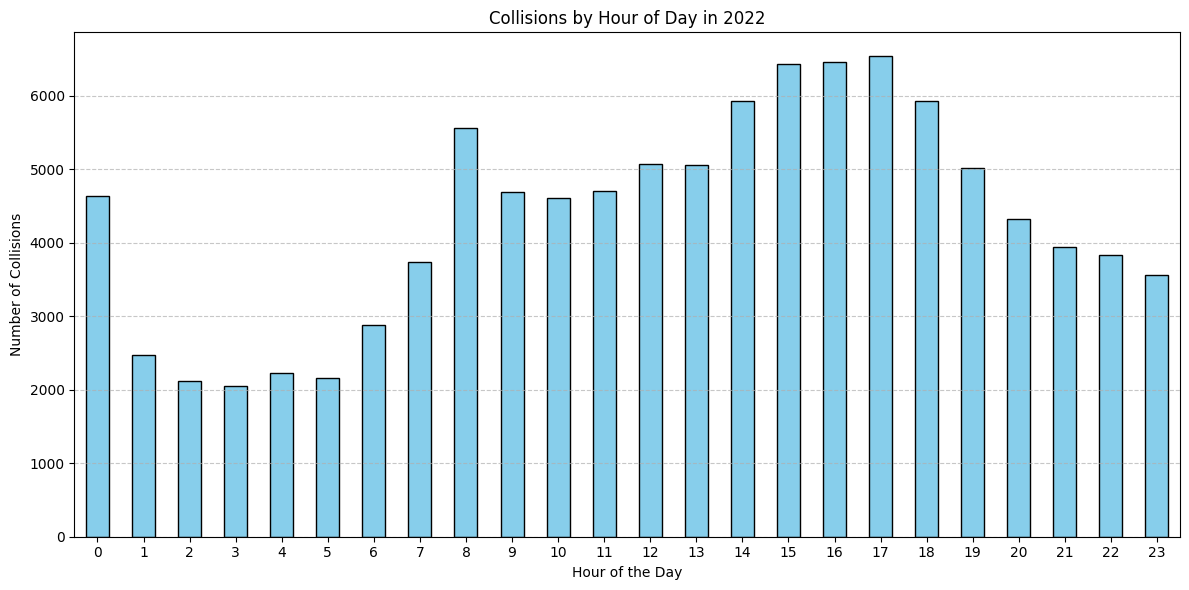

In [82]:
df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour
hourly_collisions = df.groupby('CRASH HOUR').size()
plt.figure(figsize=(12, 6))
hourly_collisions.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Collisions by Hour of Day in 2022')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


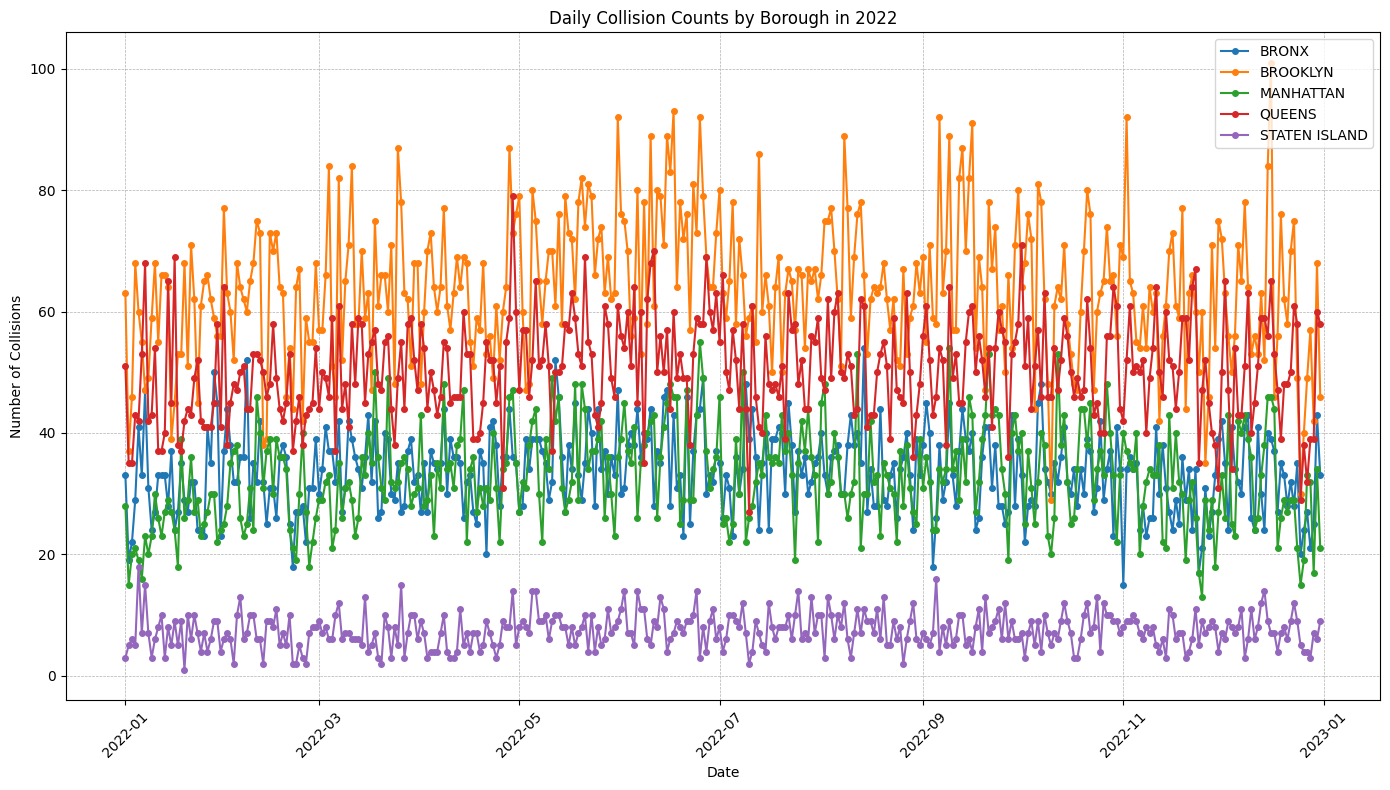

In [83]:
borough_daily_counts = df.groupby(['BOROUGH', 'CRASH DATE']).size().unstack(level=0)

# Plotting
plt.figure(figsize=(14, 8))

# Plot each borough's daily count
for borough in borough_daily_counts.columns:
    plt.plot(borough_daily_counts.index, borough_daily_counts[borough], label=borough, marker='o', markersize=4)

plt.title('Daily Collision Counts by Borough in 2022')
plt.xlabel('Date')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()



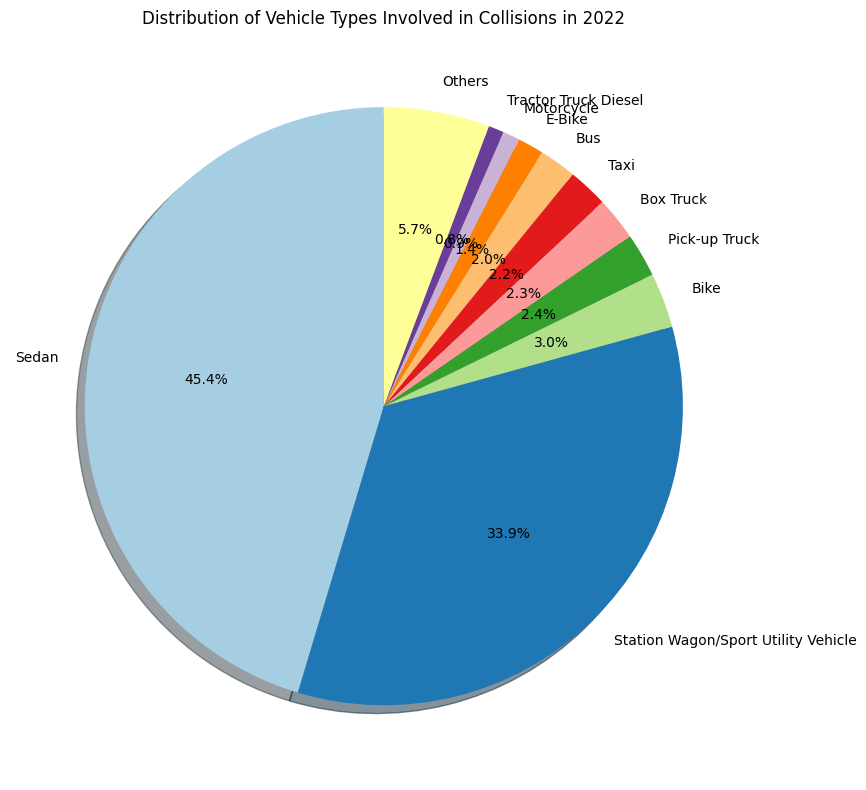

In [86]:
all_vehicle_types = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2'], df['VEHICLE TYPE CODE 3'], df['VEHICLE TYPE CODE 4'], df['VEHICLE TYPE CODE 5']])

vehicle_counts = all_vehicle_types.value_counts()

top_vehicle_counts = vehicle_counts.head(10)
top_vehicle_counts['Others'] = vehicle_counts[10:].sum()

# Plotting
plt.figure(figsize=(12, 8))
top_vehicle_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, colors=plt.cm.Paired.colors)
plt.title('Distribution of Vehicle Types Involved in Collisions in 2022')
plt.ylabel('')  
plt.tight_layout()

plt.show()

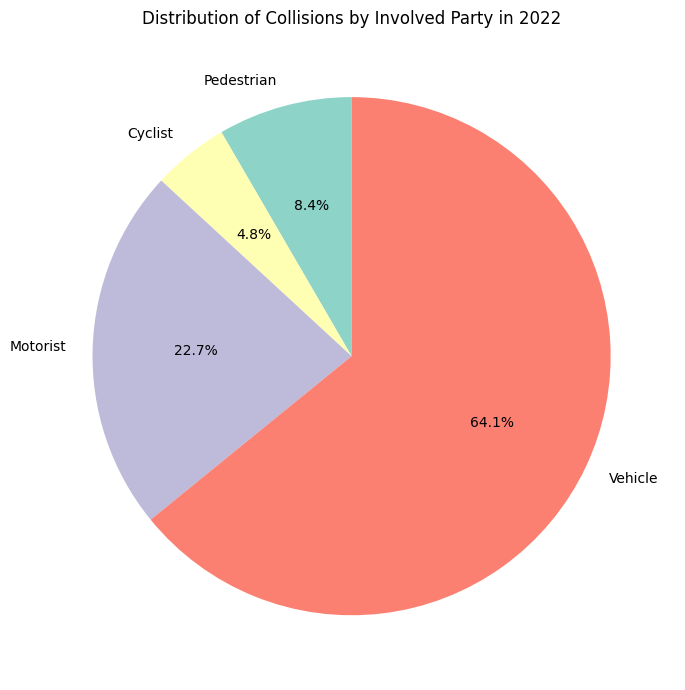

In [87]:
df['Pedestrian_Involved'] = (df['NUMBER OF PEDESTRIANS INJURED'] > 0) | (df['NUMBER OF PEDESTRIANS KILLED'] > 0)
df['Cyclist_Involved'] = (df['NUMBER OF CYCLIST INJURED'] > 0) | (df['NUMBER OF CYCLIST KILLED'] > 0)
df['Motorist_Involved'] = (df['NUMBER OF MOTORIST INJURED'] > 0) | (df['NUMBER OF MOTORIST KILLED'] > 0)

incident_counts = {
    'Pedestrian': df['Pedestrian_Involved'].sum(),
    'Cyclist': df['Cyclist_Involved'].sum(),
    'Motorist': df['Motorist_Involved'].sum(),
    'Vehicle': len(df) - df[['Pedestrian_Involved', 'Cyclist_Involved', 'Motorist_Involved']].any(axis=1).sum()
}

plt.figure(figsize=(10, 7))
plt.pie(incident_counts.values(), labels=incident_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Collisions by Involved Party in 2022')
plt.tight_layout()

plt.show()
